## Fetching Data

In [162]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):    
    if not os.path.isdir(housing_path):        
        os.makedirs(housing_path)    
        
    tgz_path = os.path.join(housing_path, "housing.tgz")    
    urllib.request.urlretrieve(housing_url, tgz_path)  
    
    housing_tgz = tarfile.open(tgz_path)    
    housing_tgz.extractall(path=housing_path)    
    housing_tgz.close()

In [163]:
fetch_housing_data()

In [165]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):    
    csv_path = os.path.join(housing_path, "housing.csv")    
    return pd.read_csv(csv_path)

df = load_housing_data()

In [166]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Copy data, combine attributes

In [168]:
data = df.copy()
data['rooms_per_households'] = data['total_rooms']/data['households']
data['bedrooms_to_total_rooms'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

In [169]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,bedrooms_to_total_rooms,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


## Convert categorical to numeric

In [170]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [171]:
ocean_numeric = {'<1H OCEAN' : 1,
                 'NEAR BAY' : 2,
                 'INLAND' : 3, 
                 'NEAR OCEAN' : 4, 
                 'ISLAND' : 5}
data['ocean_proximity_numeric'] = data['ocean_proximity'].apply(lambda x: ocean_numeric[x])

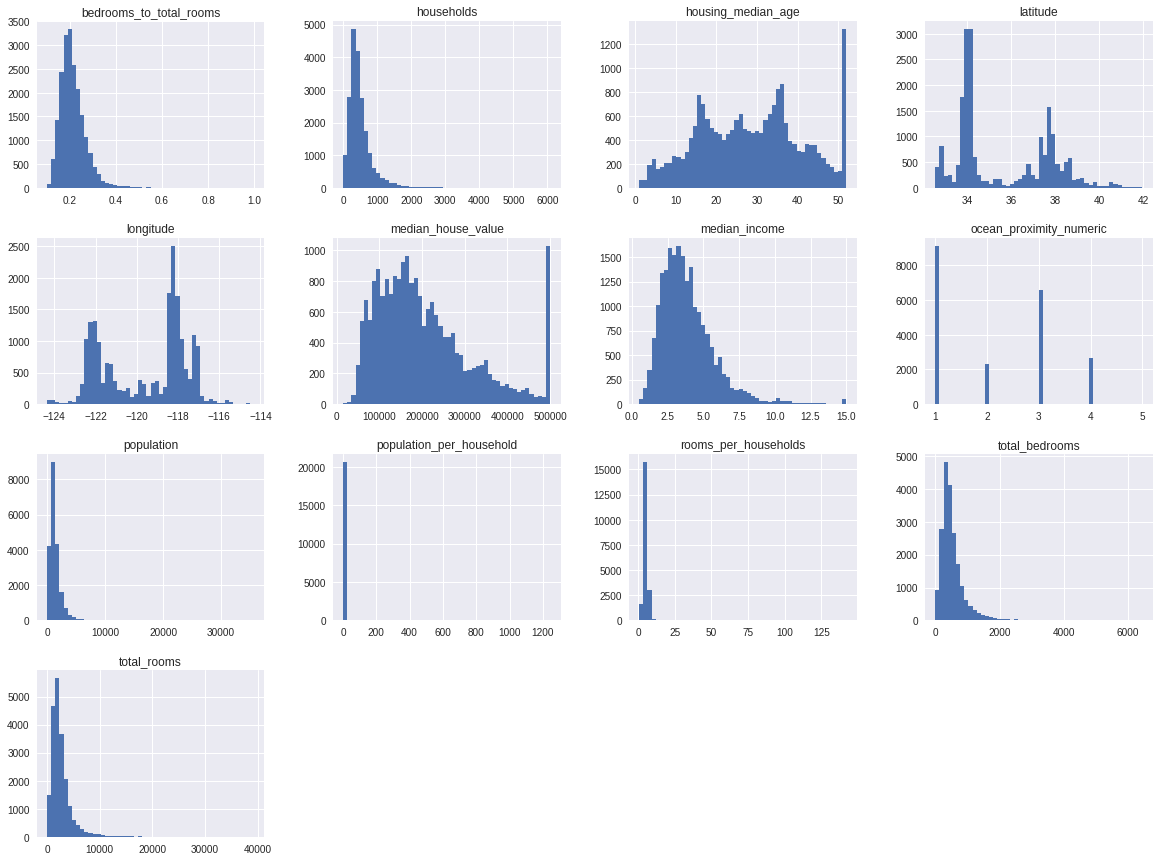

In [138]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

data.hist(bins=50, figsize=(20,15))
plt.show()

## Creating a Test Set

In [139]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(1774)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [140]:
train_set, test_set = split_train_test(data, 0.2)

In [141]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [142]:
data_id = data.reset_index()
data_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,bedrooms_to_total_rooms,population_per_household,ocean_proximity_numeric
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,2
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,2
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,2
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,2
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,2


## Using Scikitlearn's train_test_split

In [143]:
data['income_cat'] = np.ceil(data['median_income'] / 1.5)
data['income_cat'].where(data['income_cat'] < 5, 5.0, inplace=True)

In [144]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,bedrooms_to_total_rooms,population_per_household,ocean_proximity_numeric,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,2,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,2,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,2,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,2,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,2,3.0


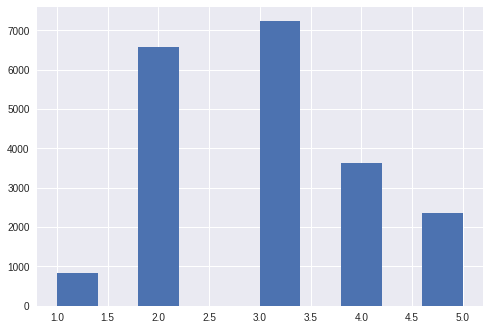

In [145]:
data['income_cat'].hist()

In [146]:
# Sometimes, attribute combinations may prove more intuitive than individual attributes alone

data['rooms_per_households'] = data['total_rooms']/data['households']
data['bedrooms_to_total_rooms'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

In [147]:
# select only numeric columns from the data set

data_modified = data[['longitude', 
                      'latitude', 
                      'housing_median_age', 
                      'median_income', 
                      'ocean_proximity_numeric', 
                      'total_rooms',
                      'total_bedrooms',
                      'population',
                      'households',
                      'rooms_per_households', 
                      'bedrooms_to_total_rooms', 
                      'population_per_household', 'median_house_value']]

In [148]:
data_modified = data_modified.dropna()

In [149]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_modified, test_size=0.2, random_state=2412)

In [150]:
test_set.head()

,longitude,latitude,housing_median_age,median_income,ocean_proximity_numeric,total_rooms,total_bedrooms,population,households,rooms_per_households,bedrooms_to_total_rooms,population_per_household,median_house_value
8797,-118.46,33.77,28.0,10.5536,4,3065.0,406.0,1101.0,391.0,7.838875,0.132463,2.815857,500001.0
5743,-118.26,34.17,20.0,3.8576,1,5949.0,1417.0,2593.0,1337.0,4.449514,0.238191,1.939417,318600.0
13389,-117.58,34.10,4.0,3.5186,3,6360.0,1584.0,3359.0,1396.0,4.555874,0.249057,2.406160,127800.0
20449,-118.88,34.28,22.0,4.0474,1,3369.0,771.0,2751.0,710.0,4.745070,0.228851,3.874648,182100.0
14306,-117.14,32.71,52.0,1.5594,4,800.0,313.0,1337.0,282.0,2.836879,0.391250,4.741135,87500.0


In [151]:
train_set.head()

,longitude,latitude,housing_median_age,median_income,ocean_proximity_numeric,total_rooms,total_bedrooms,population,households,rooms_per_households,bedrooms_to_total_rooms,population_per_household,median_house_value
11473,-117.99,33.71,18.0,2.7614,1,1994.0,578.0,3031.0,577.0,3.455806,0.289870,5.253033,237500.0
9804,-121.92,36.55,44.0,3.6000,4,3494.0,635.0,693.0,415.0,8.419277,0.181740,1.669880,452800.0
5491,-118.46,33.97,19.0,3.8698,1,1658.0,427.0,648.0,378.0,4.386243,0.257539,1.714286,500001.0
14702,-117.07,32.79,36.0,3.9745,4,3583.0,642.0,1711.0,602.0,5.951827,0.179179,2.842193,170800.0
14507,-117.21,32.89,14.0,3.3176,4,3114.0,773.0,1592.0,776.0,4.012887,0.248234,2.051546,156100.0


/home/ssikdar/venvs/env3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


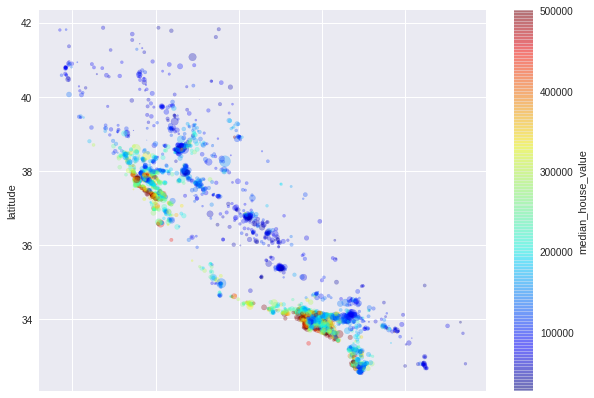

In [152]:
%matplotlib inline
test_set.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, 
          s=data['population']/100.0, figsize=(10,7), 
          c="median_house_value", cmap=plt.get_cmap("jet"), 
          colorbar=True)
plt.legend()

/home/ssikdar/venvs/env3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


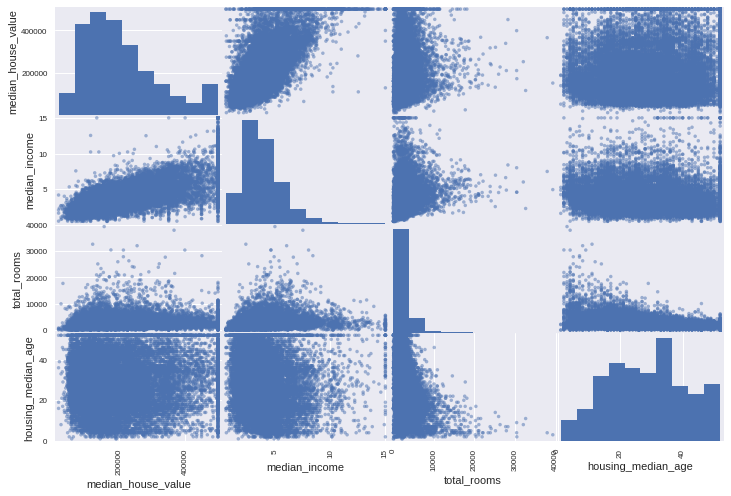

In [153]:
from pandas.tools.plotting import scatter_matrix

plt.style.use('seaborn')

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"];
scatter_matrix(data[attributes], figsize=(12, 8), cmap=plt.get_cmap("jet"));


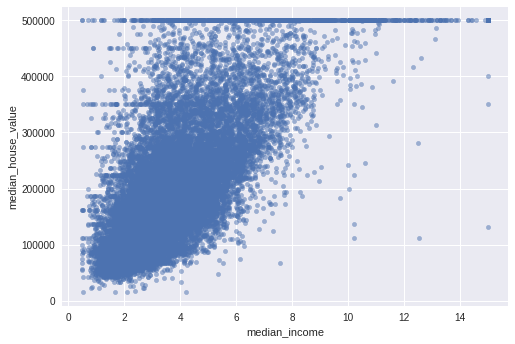

In [154]:
plt.style.use('seaborn')

data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.5)

### Using ScikitLearn's Linear Regression Model 

In [155]:
data_attributes = train_set.drop(['median_house_value'], axis=1)
data_labels = train_set['median_house_value'].copy()

In [158]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=data_attributes, y=data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
test_data = test_set.copy()

In [160]:
test_attr = test_data.drop(['median_house_value'], axis=1)
test_labels = test_data['median_house_value'].copy()
model.predict(test_attr)

array([ 494880.80444933,  270285.0782449 ,  189932.86349903, ...,
        237589.79906613,  255878.3076722 ,  174127.85459659])

In [161]:
model.score(test_attr, test_labels)

0.65089187065001008